In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from signals import (
    compute_ttm_sbc_and_repurchase,
    compute_market_cap,
    compute_net_dilution,
    generate_signals
)

## Generate trading signals

In [2]:
lyft_df = pd.read_csv('../data/LYFT.csv')
uber_df = pd.read_csv('../data/UBER.csv')

lyft_df = compute_ttm_sbc_and_repurchase(lyft_df)
lyft_df = compute_market_cap(lyft_df)
lyft_df = compute_net_dilution(lyft_df)
lyft_df = generate_signals(lyft_df)

uber_df = compute_ttm_sbc_and_repurchase(uber_df)
uber_df = compute_market_cap(uber_df)
uber_df = compute_net_dilution(uber_df)
uber_df = generate_signals(uber_df)

# Only take post-IPO data
lyft_df = lyft_df.dropna(subset=['closing_price'])
uber_df = uber_df.dropna(subset=['closing_price'])

uber_df, lyft_df

(          date  Share Repurchase  Cash Flow SBC  shares_outstanding  \
 4   2019-06-30      0.000000e+00   3.952000e+09        1.695553e+09   
 5   2019-09-30      0.000000e+00   4.353000e+09        1.700004e+09   
 6   2020-03-31      0.000000e+00   2.770000e+08        1.705815e+09   
 7   2020-06-30      0.000000e+00   4.080000e+08        1.733987e+09   
 8   2020-09-30      0.000000e+00   5.910000e+08        1.752623e+09   
 9   2021-03-31      0.000000e+00   2.810000e+08        1.763768e+09   
 10  2021-06-30      0.000000e+00   5.530000e+08        1.871760e+09   
 11  2021-09-30      0.000000e+00   8.340000e+08        1.884347e+09   
 12  2022-03-31      0.000000e+00   3.590000e+08        1.940118e+09   
 13  2022-06-30      0.000000e+00   8.290000e+08        1.963660e+09   
 14  2022-09-30      0.000000e+00   1.311000e+09        1.979918e+09   
 15  2023-03-31      0.000000e+00   4.700000e+08        1.994407e+09   
 16  2023-06-30      0.000000e+00   9.740000e+08        2.023827

## Test signal vs prices

Fetching UBER data from 2019-06-30 to 2025-09-30...


NameError: name 'mdates' is not defined

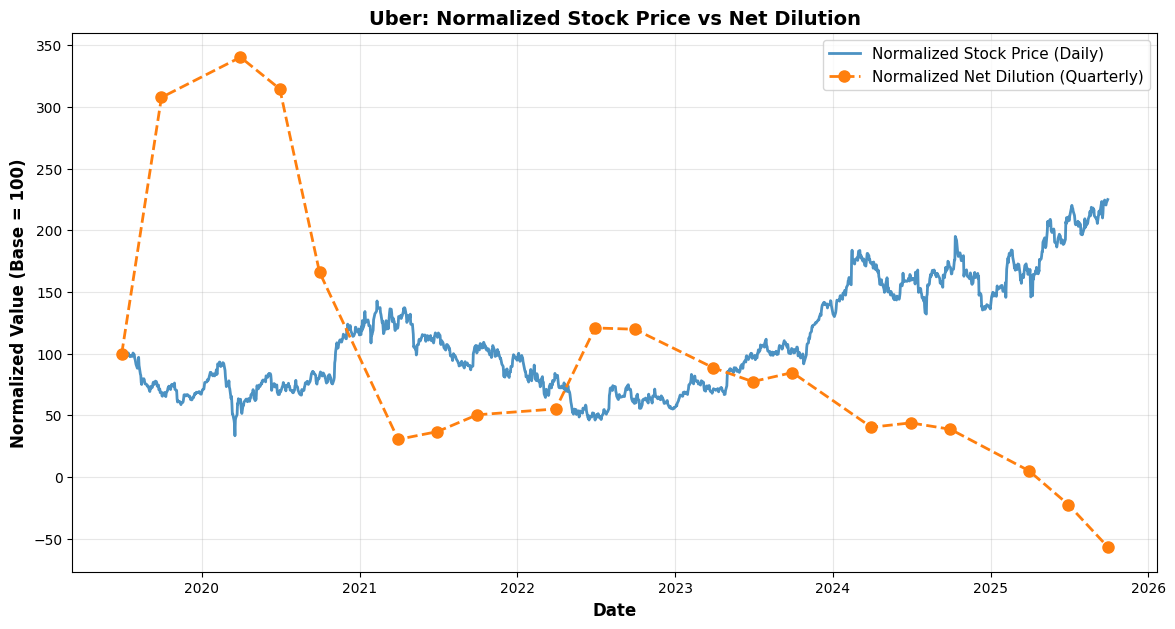

In [4]:
# Get the date range from uber_df
start_date = uber_df['date'].min()
end_date = uber_df['date'].max()

# Convert to datetime if they're strings
if isinstance(start_date, str):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

# Fetch daily stock price data for UBER
print(f"Fetching UBER data from {start_date.date()} to {end_date.date()}...")
uber_ticker = yf.Ticker("UBER")
daily_prices = uber_ticker.history(start=start_date, end=end_date)

# Get closing prices
daily_close = daily_prices['Close'].reset_index()
daily_close.columns = ['Date', 'Close']

# Normalize daily closing prices (to 100 at start)
daily_close['Normalized_Price'] = (daily_close['Close'] / daily_close['Close'].iloc[0]) * 100

# Prepare quarterly data
uber_df['date'] = pd.to_datetime(uber_df['date'])
quarterly_data = uber_df[['date', 'net_dilution']].copy()

# Normalize net_dilution (to 100 at start)
first_valid_dilution = quarterly_data['net_dilution'].dropna().iloc[0]
quarterly_data['Normalized_Dilution'] = (quarterly_data['net_dilution'] / first_valid_dilution) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot normalized daily closing prices
ax.plot(daily_close['Date'], daily_close['Normalized_Price'], 
        label='Normalized Stock Price (Daily)', linewidth=2, color='#1f77b4', alpha=0.8)

# Plot normalized net_dilution (quarterly data as points and line)
ax.plot(quarterly_data['date'], quarterly_data['Normalized_Dilution'], 
        marker='o', linestyle='--', linewidth=2, markersize=8,
        label='Normalized Net Dilution (Quarterly)', color='#ff7f0e')

# Formatting
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Normalized Value (Base = 100)', fontsize=12, fontweight='bold')
ax.set_title('Uber: Normalized Stock Price vs Net Dilution', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"\nStock Price:")
print(f"  Start: ${daily_close['Close'].iloc[0]:.2f}")
print(f"  End: ${daily_close['Close'].iloc[-1]:.2f}")
print(f"  Change: {((daily_close['Close'].iloc[-1] / daily_close['Close'].iloc[0]) - 1) * 100:.2f}%")

print(f"\nNet Dilution:")
print(f"  Start: {quarterly_data['net_dilution'].dropna().iloc[0]:.4f}")
print(f"  End: {quarterly_data['net_dilution'].dropna().iloc[-1]:.4f}")
print(f"  Change: {((quarterly_data['net_dilution'].dropna().iloc[-1] / quarterly_data['net_dilution'].dropna().iloc[0]) - 1) * 100:.2f}%")

Fetching LYFT data from 2019-03-31 to 2025-09-30...


NameError: name 'mdates' is not defined

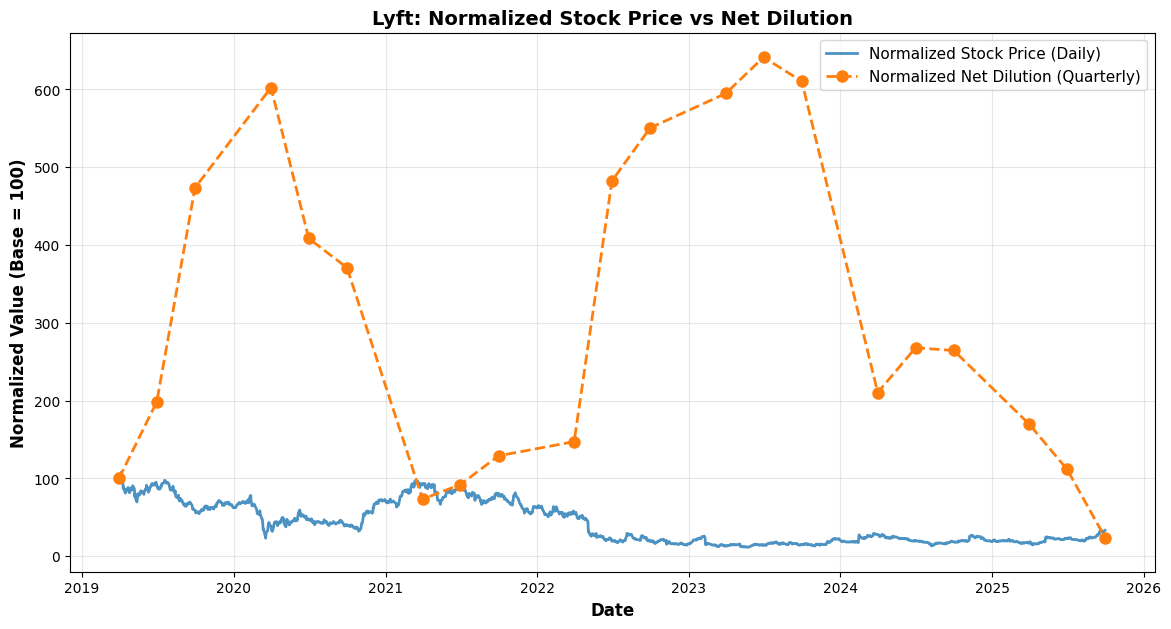

In [5]:
# Get the date range from lyft_df
start_date = lyft_df['date'].min()
end_date = lyft_df['date'].max()

# Convert to datetime if they're strings
if isinstance(start_date, str):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

# Fetch daily stock price data for LYFT
print(f"Fetching LYFT data from {start_date.date()} to {end_date.date()}...")
lyft_ticker = yf.Ticker("LYFT")
daily_prices = lyft_ticker.history(start=start_date, end=end_date)

# Get closing prices
daily_close = daily_prices['Close'].reset_index()
daily_close.columns = ['Date', 'Close']

# Normalize daily closing prices (to 100 at start)
daily_close['Normalized_Price'] = (daily_close['Close'] / daily_close['Close'].iloc[0]) * 100

# Prepare quarterly data
lyft_df['date'] = pd.to_datetime(lyft_df['date'])
quarterly_data = lyft_df[['date', 'net_dilution']].copy()

# Normalize net_dilution (to 100 at start)
first_valid_dilution = quarterly_data['net_dilution'].dropna().iloc[0]
quarterly_data['Normalized_Dilution'] = (quarterly_data['net_dilution'] / first_valid_dilution) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot normalized daily closing prices
ax.plot(daily_close['Date'], daily_close['Normalized_Price'], 
        label='Normalized Stock Price (Daily)', linewidth=2, color='#1f77b4', alpha=0.8)

# Plot normalized net_dilution (quarterly data as points and line)
ax.plot(quarterly_data['date'], quarterly_data['Normalized_Dilution'], 
        marker='o', linestyle='--', linewidth=2, markersize=8,
        label='Normalized Net Dilution (Quarterly)', color='#ff7f0e')

# Formatting
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Normalized Value (Base = 100)', fontsize=12, fontweight='bold')
ax.set_title('Lyft: Normalized Stock Price vs Net Dilution', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"\nStock Price:")
print(f"  Start: ${daily_close['Close'].iloc[0]:.2f}")
print(f"  End: ${daily_close['Close'].iloc[-1]:.2f}")
print(f"  Change: {((daily_close['Close'].iloc[-1] / daily_close['Close'].iloc[0]) - 1) * 100:.2f}%")

print(f"\nNet Dilution:")
print(f"  Start: {quarterly_data['net_dilution'].dropna().iloc[0]:.4f}")
print(f"  End: {quarterly_data['net_dilution'].dropna().iloc[-1]:.4f}")
print(f"  Change: {((quarterly_data['net_dilution'].dropna().iloc[-1] / quarterly_data['net_dilution'].dropna().iloc[0]) - 1) * 100:.2f}%")

## Create backtesting

In [6]:
def calculate_strategy_returns(df, ticker_name):
    """
    Calculate returns for the trading strategy based on position signals.
    
    Args:
        df: DataFrame with 'position' and 'closing_price' columns
        ticker_name: Name of the ticker for labeling
    
    Returns:
        DataFrame with strategy returns and cumulative returns
    """
    df = df.copy()
    df = df.sort_values('date').reset_index(drop=True)
    
    # Calculate price returns (percent change)
    df['price_return'] = df['closing_price'].pct_change()
    
    # Calculate strategy returns (position * return)
    # Use previous period's position to determine current period's return
    df['strategy_return'] = df['position'].shift(1) * df['price_return']
    
    # Calculate cumulative returns
    df['cumulative_market_return'] = (1 + df['price_return']).cumprod() - 1
    df['cumulative_strategy_return'] = (1 + df['strategy_return'].fillna(0)).cumprod() - 1
    
    return df

In [7]:
def get_sp500_data(start_date, end_date):
    sp500 = yf.download(
        "^GSPC",
        start=start_date,
        end=end_date,
        progress=False,
        auto_adjust=False,   # set explicitly to silence FutureWarning + keep schema stable
    )

    # Robustly extract Close as a 1-D Series
    close = sp500["Close"]
    if isinstance(close, pd.DataFrame):
        # happens if columns are multi-indexed (e.g., Close has a ticker subcolumn)
        close = close.iloc[:, 0]

    sp500_df = close.rename("sp500_price").reset_index()  # Date -> column
    sp500_df = sp500_df.rename(columns={"Date": "date"})  # yfinance uses "Date"

    sp500_df["sp500_return"] = sp500_df["sp500_price"].pct_change()
    sp500_df["sp500_cumulative_return"] = (1 + sp500_df["sp500_return"]).cumprod() - 1

    return sp500_df

In [8]:
def plot_positions(df, ticker_name):
    """Plot the trading positions over time."""
    fig, ax = plt.subplots(figsize=(14, 6))
    
    df['date_dt'] = pd.to_datetime(df['date'])
    
    # Create a step plot for positions
    ax.step(df['date_dt'], df['position'], where='post', linewidth=2, label='Position')
    ax.fill_between(df['date_dt'], df['position'], step='post', alpha=0.3)
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Position', fontsize=12)
    ax.set_title(f'{ticker_name} Trading Positions Over Time', fontsize=14, fontweight='bold')
    ax.set_yticks([-1, 0, 1])
    ax.set_yticklabels(['Short (-1)', 'Neutral (0)', 'Long (+1)'])
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

In [9]:
def plot_performance_comparison(df, sp500_df, ticker_name):
    """Plot cumulative returns comparison."""
    fig, ax = plt.subplots(figsize=(14, 8))
    
    df['date_dt'] = pd.to_datetime(df['date'])
    sp500_df['date_dt'] = pd.to_datetime(sp500_df['date'])
    
    # Plot strategy returns
    ax.plot(df['date_dt'], df['cumulative_strategy_return'] * 100, 
            linewidth=2.5, label=f'{ticker_name} Strategy', marker='o', markersize=6)
    
    # Plot buy-and-hold returns
    ax.plot(df['date_dt'], df['cumulative_market_return'] * 100, 
            linewidth=2.5, label=f'{ticker_name} Buy & Hold', marker='s', markersize=6)
    
    # Plot S&P 500 returns
    ax.plot(sp500_df['date_dt'], sp500_df['sp500_cumulative_return'] * 100, 
            linewidth=2, label='S&P 500', alpha=0.8)
    
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Return (%)', fontsize=12)
    ax.set_title(f'{ticker_name} Strategy Performance vs S&P 500', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

Processing UBER backtest...


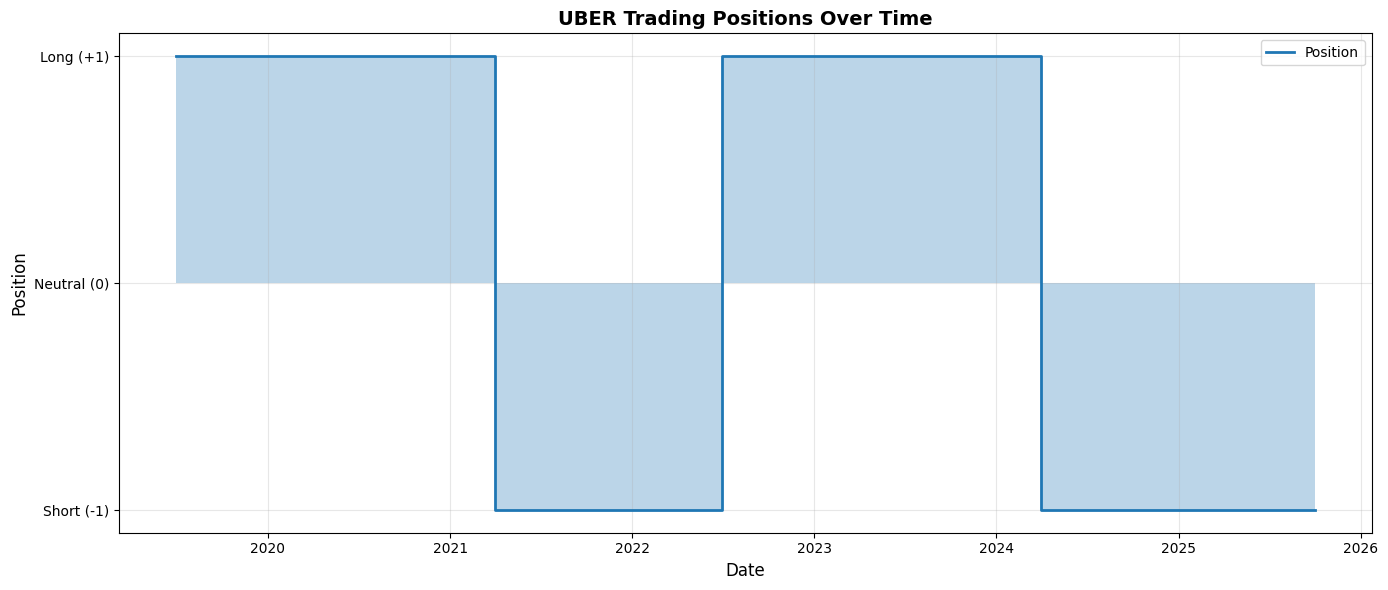

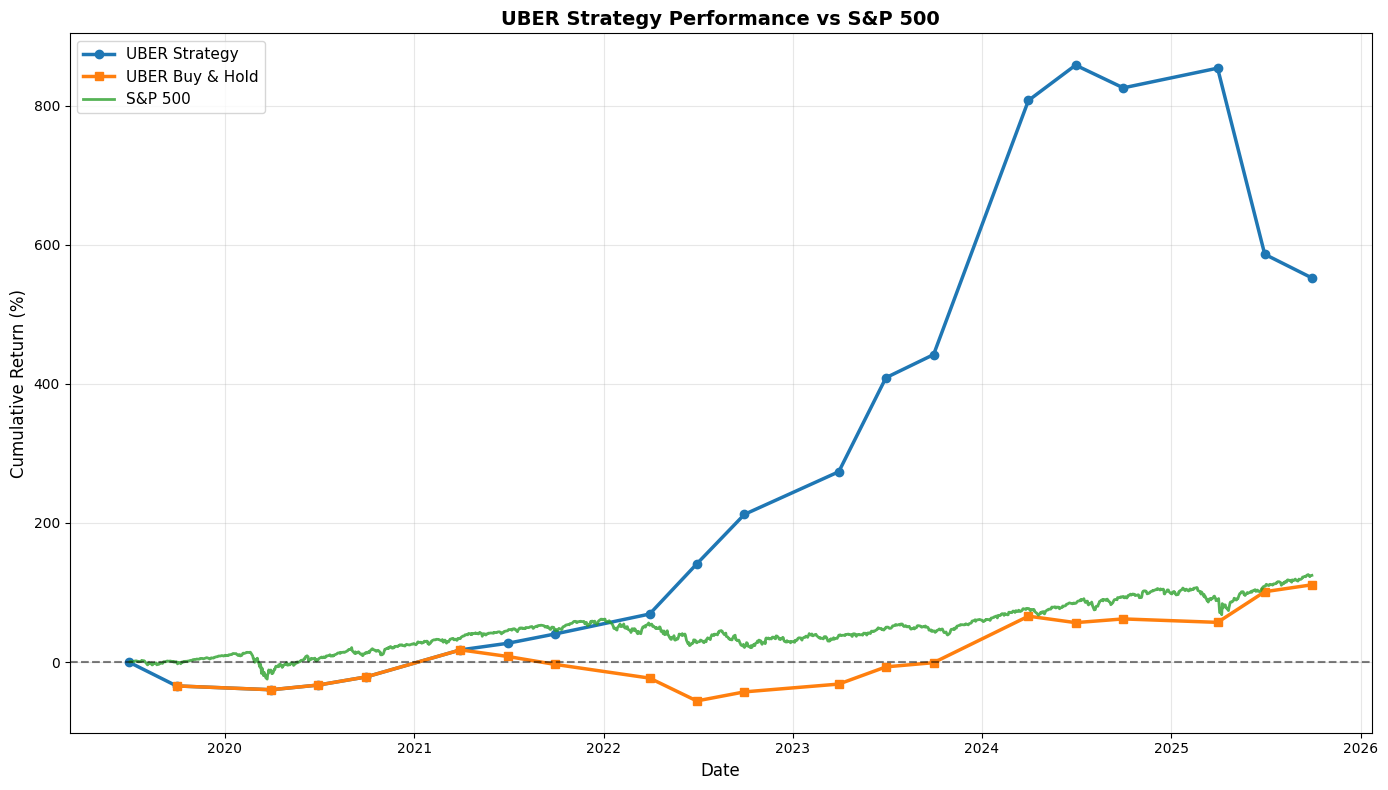

NameError: name 'print_performance_metrics' is not defined

In [10]:
print("Processing UBER backtest...")
uber_backtest = calculate_strategy_returns(uber_df, 'UBER')
uber_start = uber_backtest['date'].min()
uber_end = uber_backtest['date'].max()
sp500_uber = get_sp500_data(uber_start, uber_end)

plot_positions(uber_backtest, 'UBER')
plot_performance_comparison(uber_backtest, sp500_uber, 'UBER')
print_performance_metrics(uber_backtest, sp500_uber, 'UBER')

Processing LYFT backtest...


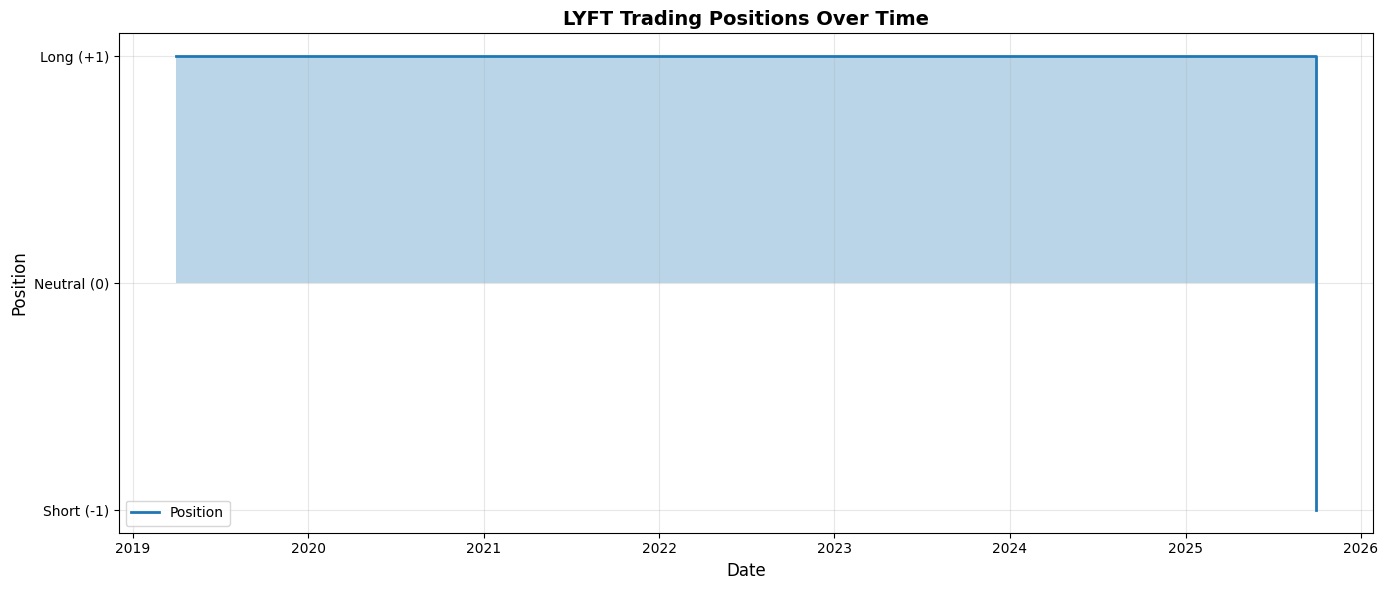

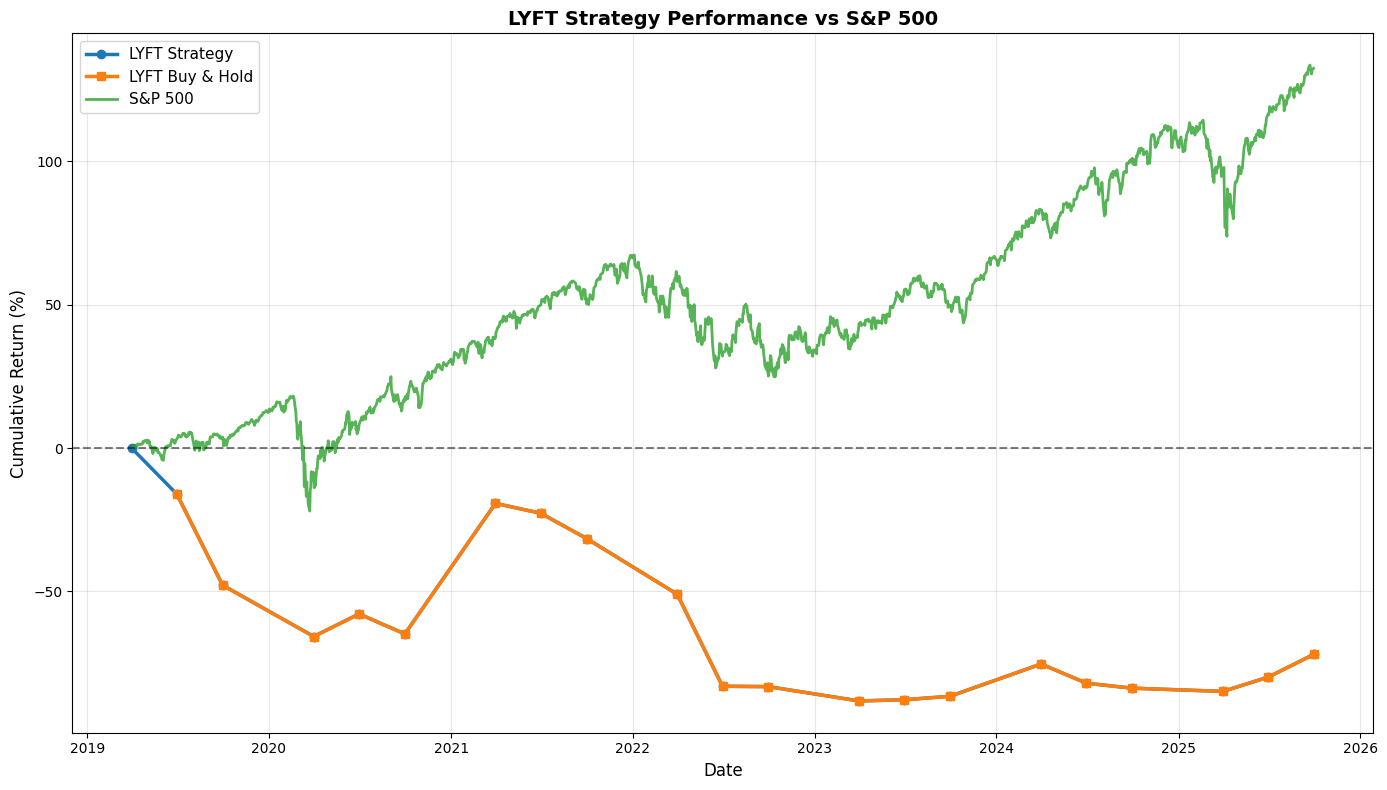

NameError: name 'print_performance_metrics' is not defined

In [11]:
print("Processing LYFT backtest...")
lyft_backtest = calculate_strategy_returns(lyft_df, 'LYFT')
lyft_start = lyft_backtest['date'].min()
lyft_end = lyft_backtest['date'].max()
sp500_lyft = get_sp500_data(lyft_start, lyft_end)

plot_positions(lyft_backtest, 'LYFT')
plot_performance_comparison(lyft_backtest, sp500_lyft, 'LYFT')
print_performance_metrics(lyft_backtest, sp500_lyft, 'LYFT')